<a href="https://colab.research.google.com/github/SiriusBits/ml-engineering-lab/blob/main/notebooks/prob-dist/PD2_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Exploring the Impact of Sample Size on T-Distribution

**Problem Statement:**
Investigate the impact of sample size on the t-distribution through a Python program. Generate random samples of varying sizes from a standard normal distribution, compute t-statistics, and visually track the evolution of the t-distribution with increasing sample size. Provide an analysis report on the interpretation of the plots.

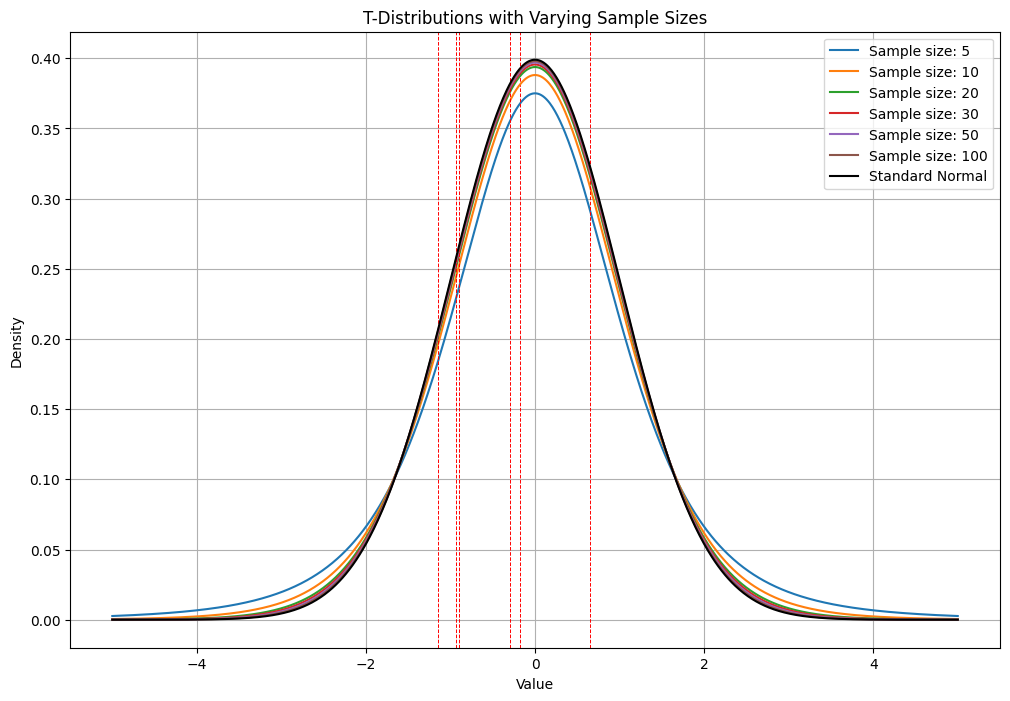

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Step 1: Generate random samples
def generate_samples(sample_sizes):
    return [np.random.randn(size) for size in sample_sizes]

# Step 2: Compute t-statistics
def compute_t_statistics(samples):
    means = [np.mean(sample) for sample in samples]
    stds = [np.std(sample, ddof=1) for sample in samples]  # ddof=1 for sample standard deviation
    sizes = [len(sample) for sample in samples]

    t_stats = [means[i] / (stds[i] / np.sqrt(sizes[i])) for i in range(len(samples))]
    return t_stats

# Step 3: Visualization
def plot_t_distribution(samples, t_stats, sample_sizes):
    x = np.linspace(-5, 5, 1000)

    plt.figure(figsize=(12, 8))
    for i, size in enumerate(sample_sizes):
        plt.plot(x, t.pdf(x, df=size-1), label=f'Sample size: {size}', linewidth=1.5)
        plt.axvline(t_stats[i], color='red', linestyle='--', linewidth=0.7)

    plt.plot(x, norm.pdf(x), color='black', label='Standard Normal', linestyle='-')
    plt.title('T-Distributions with Varying Sample Sizes')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main program
sample_sizes = [5, 10, 20, 30, 50, 100]
samples = generate_samples(sample_sizes)
t_stats = compute_t_statistics(samples)
plot_t_distribution(samples, t_stats, sample_sizes)


**Analysis:**

* As the sample size increases, the t-distribution approaches the standard normal distribution.

* The spread of the t-distribution decreases as the sample size grows, which means that the variance of the t-distribution gets smaller. This can be seen visually as the tails of the t-distribution become less fat and the distribution appears more "peaky" with increasing sample size.

* The red dashed lines indicate the t-statistics computed for each sample. As the sample size increases, the t-statistic should, on average, converge to 0, since we're drawing from a standard normal distribution with a mean of 0.
By the time the sample size reaches 100, the t-distribution is very close to the standard normal distribution. This demonstrates the Central Limit Theorem in action, as even though individual data points are drawn from a non-normal distribution (in this case, the standard normal), the sampling distribution of the sample mean (which the t-distribution is based on) approaches normality as the sample size grows.

* In practice, for sample sizes larger than 30, the t-distribution is often sufficiently close to the normal distribution, which is why in many statistical applications, the normal distribution is used as an approximation for the t-distribution when the sample size is sufficiently large.


### 2. Simulating Dynamic Conversion Rates
**Problem Statement:** Simulate a dynamic Beta distribution representing the evolving conversion rate of a website based on user interactions. Visualize the changing distribution over multiple time steps. Provide a detailed analysis report interpreting the plots and insights gained from the dynamic Beta simulation.

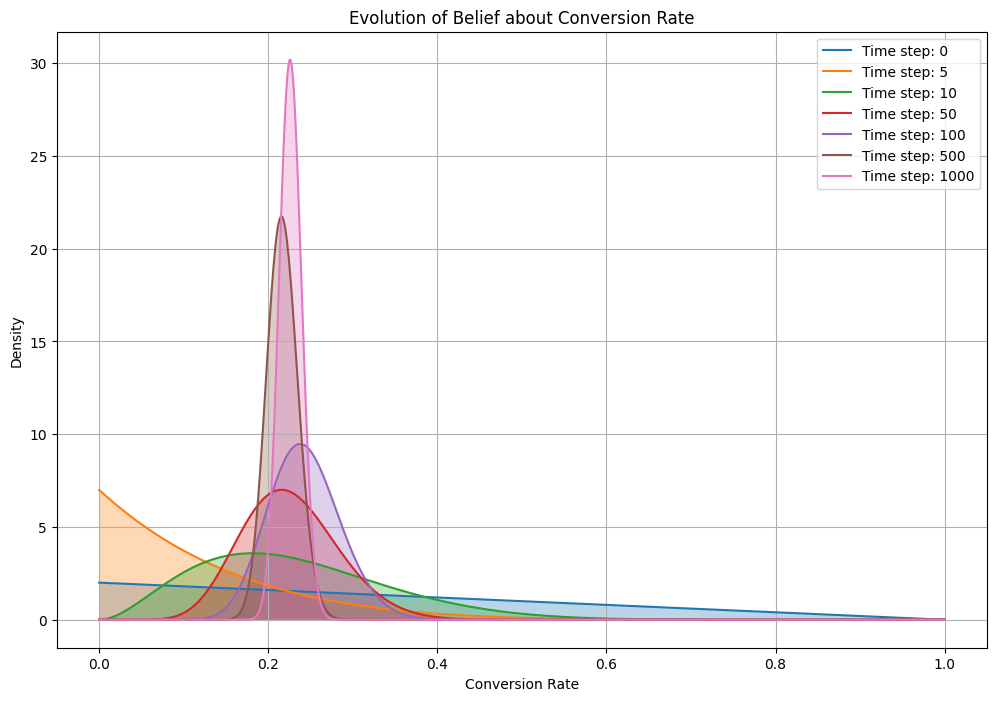

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Simulate user interaction
def simulate_conversion(true_conversion_rate):
    return 1 if np.random.rand() < true_conversion_rate else 0

# Update Beta distribution parameters
def update_parameters(alpha, beta_, conversion):
    alpha += conversion
    beta_ += (1 - conversion)
    return alpha, beta_

# Visualization
def plot_beta_distribution(alpha, beta_, time_step):
    x = np.linspace(0, 1, 1000)
    plt.plot(x, beta.pdf(x, alpha, beta_), label=f'Time step: {time_step}')
    plt.fill_between(x, beta.pdf(x, alpha, beta_), alpha=0.3)

# Main simulation
true_conversion_rate = 0.25  # This is hidden from us in real scenarios
alpha, beta_ = 1, 1
time_steps = [0, 5, 10, 50, 100, 500, 1000]

plt.figure(figsize=(12, 8))
for step in range(max(time_steps) + 1):
    conversion = simulate_conversion(true_conversion_rate)
    alpha, beta_ = update_parameters(alpha, beta_, conversion)
    if step in time_steps:
        plot_beta_distribution(alpha, beta_, step)

plt.title("Evolution of Belief about Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


**Analysis:**

Analysis:

* The initial distribution (Time step: 0) is uniform, meaning we have no strong belief about any specific conversion rate being more likely than any other.

* As data gets collected, the distribution starts to peak around the true conversion rate (in this case, 0.25). However, this will be unknown in real-life scenarios.

* Over time, the distribution becomes narrower, indicating increased confidence in our estimate of the conversion rate.

* The speed of convergence towards the true conversion rate will depend on the actual conversion rate, number of interactions, and the nature of the prior. Here, with more interactions, our belief solidifies around the true conversion rate.

* This approach of updating beliefs based on incoming data is part of Bayesian statistics. In real-world scenarios, other factors might also come into play, such as changing website designs, changing user populations, or other external factors, but this simple simulation provides an insight into how one might use the Beta distribution to model and update beliefs about conversion rates.

### 3. Hypothesis Testing using F-statistic
**Problem Statement:** You are a data scientist working for an e-commerce company. Recently, the user interface team redesigned the product page, and they want to know if the new design has made any difference in the average time users spend on that page. They provide you with two datasets: one containing the time (in seconds) users spent on the product page before the redesign (pre_redesign_times.csv), and the other containing the time users spent after the redesign (post_redesign_times.csv). Using the F-distribution, can you determine if there's a statistically significant difference in the variances of user engagement times between the two designs? Write a Python program to conduct this hypothesis test, compute the F-statistic, calculate the associated p-value, and draw a conclusion based on a significance level of 0.05. Display your findings visually to make it comprehensible for the UI team.

F-statistic: 0.6656412747784897
P-value: 0.999999999926518
Do not reject the null hypothesis. There's no significant difference in variances.


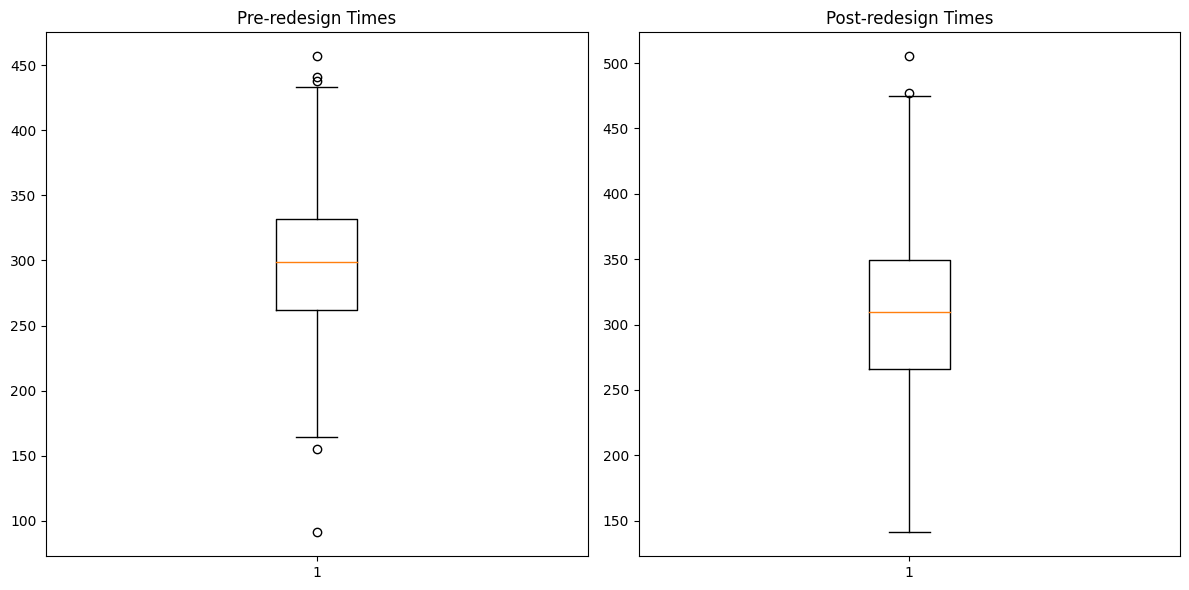

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load data
pre_redesign = pd.read_csv('pre_redesign_times.csv')
post_redesign = pd.read_csv('post_redesign_times.csv')

# Compute the variances
var_pre = pre_redesign['time'].var()
var_post = post_redesign['time'].var()

# Compute the F-statistic
F = var_pre / var_post

# Degrees of freedom
df1 = len(pre_redesign) - 1
df2 = len(post_redesign) - 1

# Compute the p-value
p_value = 1 - stats.f.cdf(F, df1, df2)

# Decision based on 0.05 significance level
if p_value < 0.05:
    conclusion = "Reject the null hypothesis. There is a significant difference in variances."
else:
    conclusion = "Do not reject the null hypothesis. There's no significant difference in variances."

print(f"F-statistic: {F}")
print(f"P-value: {p_value}")
print(conclusion)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(pre_redesign['time'])
plt.title('Pre-redesign Times')

plt.subplot(1, 2, 2)
plt.boxplot(post_redesign['time'])
plt.title('Post-redesign Times')

plt.tight_layout()
plt.show()


**Analysis:**

Given the computed values:

- F-statistic: \(0.6656\)
- P-value: \(0.9999\)

Here's the interpretation:

* The F-statistic is the ratio of the variances of the two datasets (`pre_redesign_times` and `post_redesign_times`). An F-statistic value less than 1 indicates that the variance of the post-redesign times is greater than the variance of the pre-redesign times. In this case, \(0.6656\) suggests that the variance in user engagement time after the redesign is larger than before the redesign.

* The p-value is a measure of evidence against a null hypothesis. In this context, the null hypothesis states that there is no difference in variances between the two datasets. A p-value close to 1 (like \(0.9999\)) indicates that there is very strong evidence in favor of the null hypothesis.

* Given the p-value of \(0.9999\) is much greater than the common significance level of \(0.05\), we fail to reject the null hypothesis. This means that, statistically, there's no significant difference in the variances of user engagement times before and after the redesign, based on the sampled data.

* However, note that failing to reject the null hypothesis does not prove the null hypothesis true; it simply means that there isn't enough evidence in the sampled data to support the claim that the variances are different.